In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/Raghul/Desktop/Mood/dataset/training/train_lyrics_1000.csv', usecols=range(7))
df.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [3]:
# Happy Vs Sad
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
blue = '#5A6FFA'
green = '#A3EB5B'

In [5]:
happy, sad = sum(df.loc[:, 'mood'] == 'happy'), sum(df.loc[:, 'mood'] == 'sad')
print(happy, sad)

446 554


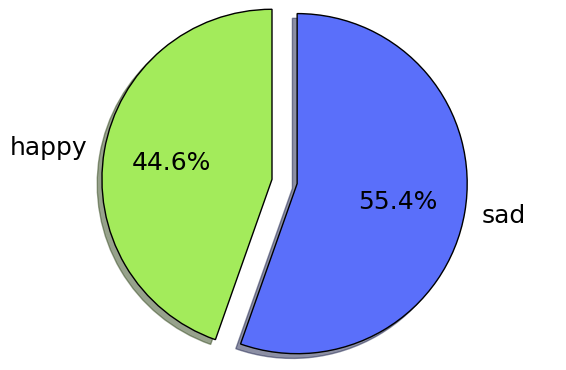

In [6]:
from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (happy, sad),
    labels=('happy','sad'),
    shadow=True,
    colors=(green, blue),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/pie_happy_sad.eps', dpi=300)

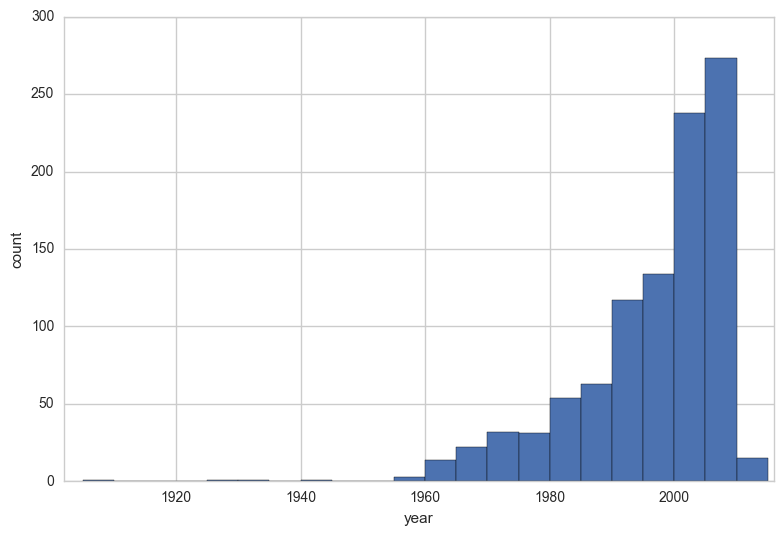

In [8]:
#Year Distribution

import numpy as np
import seaborn as sns

sns.set_style('whitegrid');

plt.hist(df['year'], bins=np.arange(1900, 2020,5))
plt.xlabel('year')
plt.ylabel('count')
plt.xlim([df['year'].min()-5, df['year'].max()+5])
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/histo_year.eps', dpi=300)

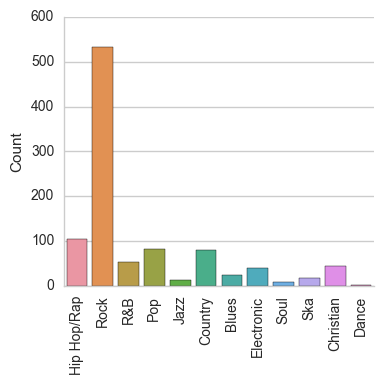

In [18]:
#Genre Distribution
sns.set_style('whitegrid')
fp = sns.factorplot(x='genre', data=df,kind="count")
fp.set_xticklabels(rotation=90)
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/bar_genre.eps', dpi=300)

mood         happy    sad
genre                    
Blues         17.0    7.0
Christian     27.0   17.0
Country       43.0   36.0
Dance          NaN    1.0
Electronic    19.0   21.0
Hip Hop/Rap   41.0   64.0
Jazz           2.0   12.0
Pop           47.0   35.0
R&B           30.0   23.0
Rock         205.0  328.0
Ska           10.0    7.0
Soul           5.0    3.0


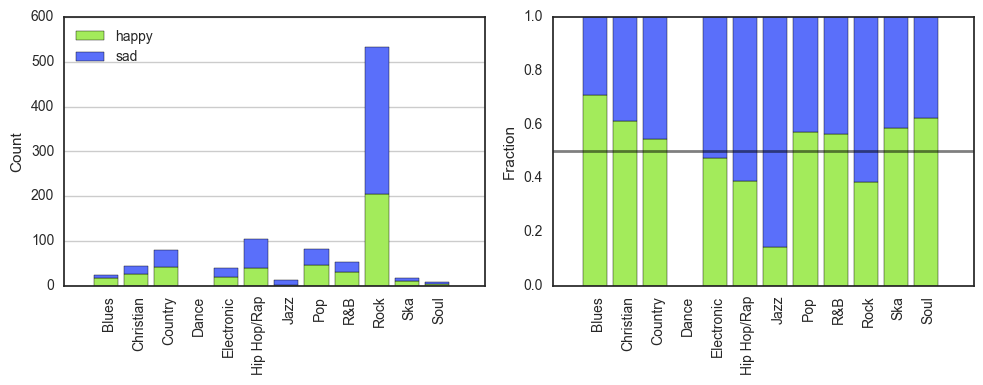

In [19]:
#Mood by Genre Distribution
gclass = df.groupby(['genre', 'mood']).size().unstack()

print(gclass)



fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,13)

# absolute values
plt.subplot(121)
plt.bar(pos, gclass.values[:,0], label='happy', color=green)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
gclass = (gclass.T / gclass.T.sum()).T 

plt.subplot(122)
plt.bar(pos, gclass.values[:,0], label='happy', color=green)
plt.bar(pos, gclass.values[:,1], bottom=gclass.values[:,0], label='sad', color=blue)
plt.xticks(pos+0.5, gclass.index, rotation='vertical')
plt.ylabel('Fraction')
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel('')
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/bar_genre_mood.eps', dpi=300)

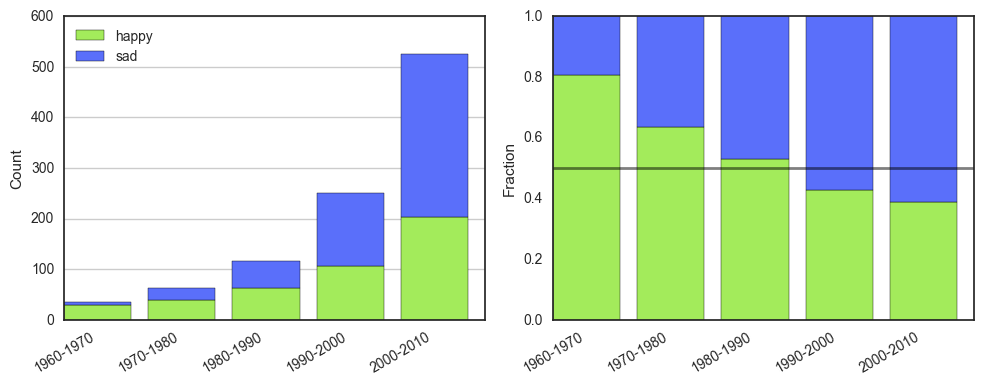

In [20]:
#Mood By Year Distribution
bins = np.arange(1960,2011,10)
happy_bins, b = np.histogram(df.loc[df.loc[:,'mood']=='happy', 'year'], bins=bins)
sad_bins, b = np.histogram(df.loc[df.loc[:,'mood']=='sad', 'year'], bins=bins)
year_bins, b = np.histogram(df.loc[:, 'year'], bins=bins)

fig = plt.figure(figsize=(10,4))

sns.set(style="white")

pos = np.arange(1,6)
labels = ['%s-%s' %(i, i+10) for i in np.arange(1960,2011,10)]

# absolute values
plt.subplot(121)
plt.bar(pos, happy_bins, label='happy', color=green)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation=30)
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

plt.gca().yaxis.grid(True) 

# relative values

# normalize
happy_bins = happy_bins / year_bins
sad_bins = sad_bins / year_bins

plt.subplot(122)
plt.bar(pos, happy_bins, color=green)
plt.bar(pos, sad_bins, bottom=happy_bins, color=blue, label='sad')
plt.xticks(pos, labels, rotation='30')
plt.ylabel("Fraction")
plt.axhline(y=0.5, xmin=0, linewidth=2, color='black', alpha=0.5)
plt.xlabel("")
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/bar_year_mood.eps', dpi=300)

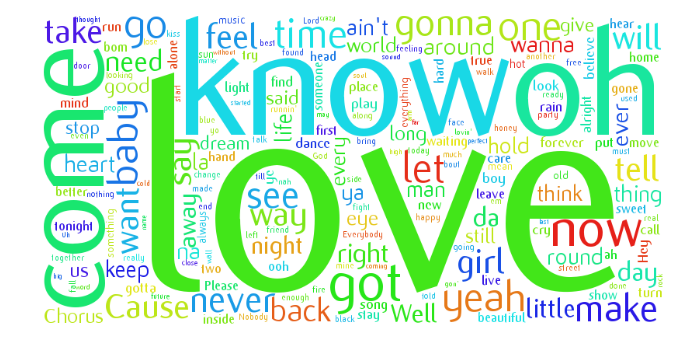

In [23]:
#Word Clouds
#Using the Wordcloud Package 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud, STOPWORDS


happy_words = ' '.join(df.loc[df['mood']=='happy', 'lyrics'])

happy_wordcloud = WordCloud( 
                      font_path='C:/Users/Raghul/Desktop/ufonts.com_flux.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=400
            ).generate(happy_words)

plt.imshow(happy_wordcloud)
plt.axis('off')
plt.savefig('C:/Users/Raghul/Desktop/wordcloud_happy_all_w.png', dpi=300)
plt.show()